In [1]:
%matplotlib inline
from dask.distributed import Client
import coffea.processor as processor
from foo import bar

In [2]:
client = Client("tls://localhost:8786")
client.upload_file('foo.py')

fileset = {'SingleMu' : ["root://eospublic.cern.ch//eos/root-eos/benchmark/Run2012B_SingleMu.root"]}

output = processor.run_uproot_job(fileset,
                                treename = 'Events',
                                processor_instance = bar(),
                                executor = processor.dask_executor,
                                executor_args = {'schema': processor.NanoAODSchema, 'client': client}
                                )

/opt/conda/lib/python3.8/site-packages/distributed/client.py:1140: VersionMismatchWarning: Mismatched versions found

+---------+-----------+-----------+----------------------------+
| Package | client    | scheduler | workers                    |
+---------+-----------+-----------+----------------------------+
| dask    | 2021.04.1 | 2021.04.1 | {'2021.04.0', '2021.04.1'} |
+---------+-----------+-----------+----------------------------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


<AxesSubplot:xlabel='MET [GeV]', ylabel='Counts'>

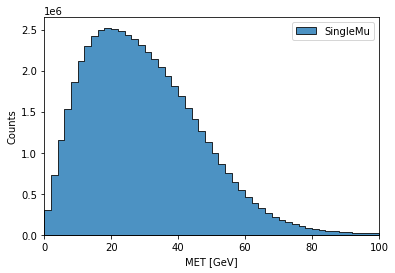

In [4]:
from coffea import hist
hist.plot1d(output['MET'], overlay='dataset', fill_opts={'edgecolor': (0,0,0,0.3), 'alpha': 0.8})